In [1]:
import yt ; yt.funcs.mylog.setLevel(50)
from yt.units import meter, gram, kilogram, second, joule
import numpy as np
import numpy.random as r
import scipy.special as spc
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import matplotlib.lines as lines

In [2]:
me = 9.1093856e-31
c = 2.99792458e8
kb = 1.38064852e-23
def fBoost(u,beta):
    Gamma = 1/np.sqrt(1-beta**2)
    return( 1/(2 * me * c * Gamma**3 * spc.kn(2,1/theta)) * (Gamma * np.sqrt(1 + (u/(me * c))**2) + theta) * np.e**(-Gamma/theta * (np.sqrt(1 + (u/(me * c))**2) - beta * u/(me * c))))
def maxwellBoltzman(u):
    return( np.sqrt(2/np.pi) * u**2 / (me*c*np.sqrt(theta))**3 * np.e**(-u**2/((me*c*np.sqrt(theta))**2)) )
def gaussian(u):
    return(1/np.sqrt(2*np.pi*me**2*c**2*theta)*np.e**(-u**2/(2*me**2*c**2*theta)))
def gaussianBoost(n,beta):
    u = np.zeros((n,3))
    Gamma = 1/(np.sqrt(1-beta**2))
    for i in range(n):
        v = np.sqrt(2*theta*c**2)
        x1 = r.rand()
        x2 = r.rand()
        x3 = r.rand()
        x4 = r.rand()
        ux = me*v*np.sqrt(-np.log(x1))*np.sin(2*np.pi*x2)
        uy = me*v*np.sqrt(-np.log(x1))*np.cos(2*np.pi*x2)
        uz = me*v*np.sqrt(-np.log(x3))*np.sin(2*np.pi*x4)
        u[i,0] = np.sqrt(ux**2 + uy**2 + uz**2)
        x5 = r.rand()
        if -beta *( ux/(me*c) ) / np.sqrt(1+(u[i,0]/(me*c))**2) > x5:
            ux = -ux
        Gamma = 1/(np.sqrt(1-beta**2))
        gamma = np.sqrt(1+(u[i,0]/(me*c))**2)
        ux = Gamma*(ux+me*beta*c*gamma)
        u[i,0] = ux
        u[i,1] = uy
        u[i,2] = uz
        return u
def fBoost(u,beta):
    Gamma = 1/np.sqrt(1-beta**2)
    return( 1/(2 * me * c * Gamma**3 * spc.kn(2,1/theta)) * (Gamma * np.sqrt(1 + (u/(me * c))**2)) * np.e**(-Gamma/theta * (np.sqrt(1 + (u/(me * c))**2) - beta * u/(me * c))))

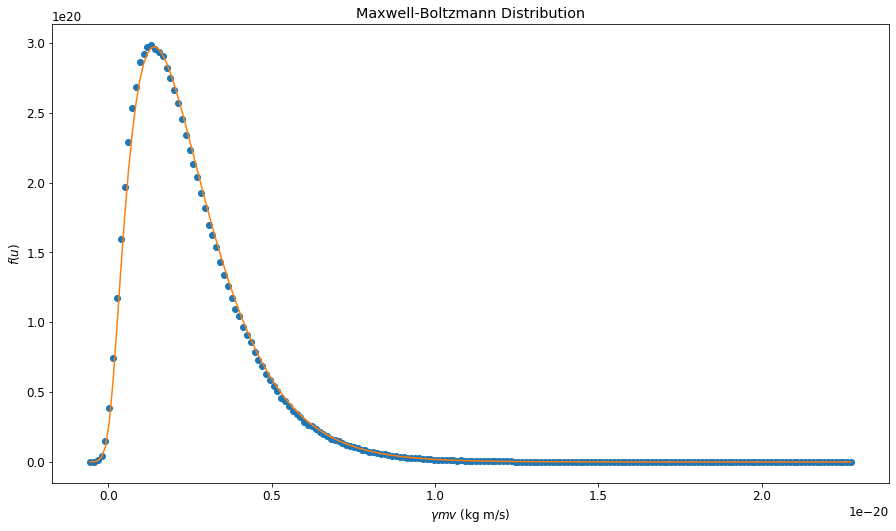

In [18]:
ds = yt.load("diags/plotfiles/plt00000")
dd = ds.all_data()

plt.rcParams['font.size'] = 12

us = dd['electrons','particle_momentum_y']

theta = 1
beta = 0.9
cmjd, u = np.histogram(us,bins=200,density=True)
u = (u[:-1]+u[1:])/2
amjd = fBoost(u,beta)
amjd = amjd/(sum(amjd)*(u[1]-u[0]))
plt.plot(u,cmjd, linestyle = '', marker = 'o', label='Computational Distribution b = 0')
plt.plot(u,amjd, label='Analytic Distribution b = 0')

plt.title('Maxwell-Boltzmann Distribution')

plt.gca().set_xlabel('$\\gamma m v$ (kg m/s)')
plt.gca().set_ylabel('$f(u)$')
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(15,4.5*15/8)

plt.savefig('WarpX MB and Analytic MB Comparison')

In [19]:
us2 = dd['electrons','particle_momentum_y']

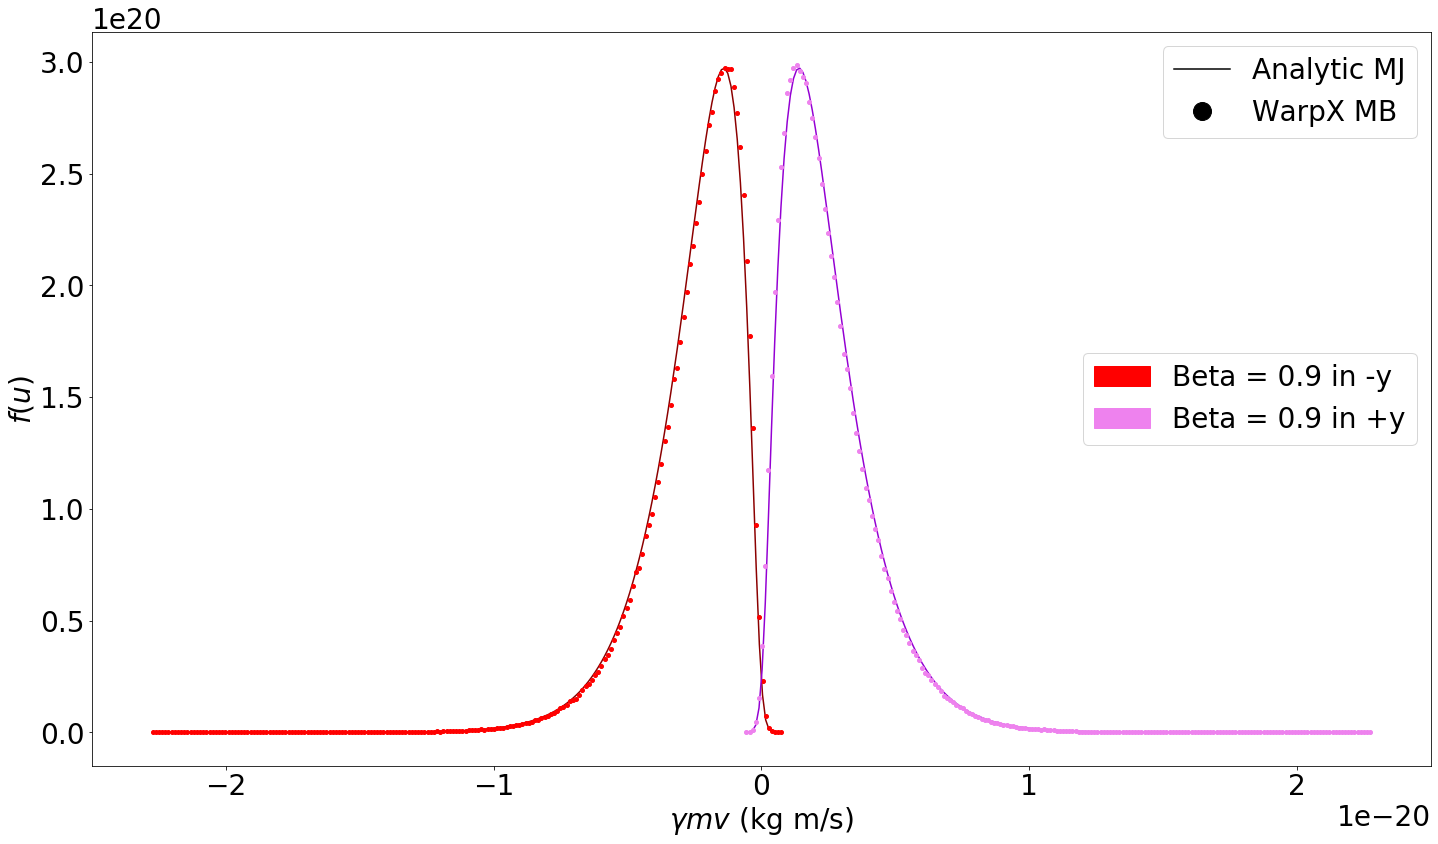

In [23]:
plt.rcParams['font.size'] = 28

theta = 1
beta = -0.9
cmjd, u = np.histogram(us1,bins=200,density=True)
u = (u[:-1]+u[1:])/2
amjd = fBoost(u,beta)
amjd = amjd/(sum(amjd)*(u[1]-u[0]))
plt.plot(u,amjd, label='Analytic Distribution b = 0', color = 'darkred')
plt.plot(u,cmjd, linestyle = '', marker = 'o', label='Computational Distribution b = 0', color = 'red', markersize = 4)

beta = 0.9
cmjd, u = np.histogram(us2,bins=200,density=True)
u = (u[:-1]+u[1:])/2
amjd = fBoost(u,beta)
amjd = amjd/(sum(amjd)*(u[1]-u[0]))
plt.plot(u,amjd, label='Analytic Distribution b = 0', color = 'darkviolet')
plt.plot(u,cmjd, linestyle = '', marker = 'o', label='Computational Distribution b = 0', color = 'violet', markersize = 4)

plt.gca().set_xlabel('$\\gamma m v$ (kg m/s)')
plt.gca().set_ylabel('$f(u)$')
plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(24,9*24/16)

first_legend = plt.legend(handles=[lines.Line2D((0,1), (0,0),color = 'black', label = 'Analytic MJ'), lines.Line2D((0,1), (0,0),color = 'black', label = 'WarpX MB', marker = 'o', markersize = 18, linestyle = '')])
plt.gca().add_artist(first_legend)
plt.legend(handles=[patch.Patch(color = 'red', label='Beta = 0.9 in -y'),patch.Patch(color = 'violet', label='Beta = 0.9 in +y')], loc = 'center right')


plt.savefig('WarpX MB and Analytic MJ at Low Theta Comparison')